# Final Project by Sara Guerreiro de Sousa 
## Part 3 - Exploratory Analysis Writeup

In this assignment, I will explore and visualize my initial analysis in order to effectively tell data's story.

**Problem statement**: Prediction of secondary student grades of two core classes (Mathematics and Portuguese) by using past school grades (first and second periods), demographic, social and other school related data. Three different DM goals (i.e. binary/5-level classification and regression) and four DM methods, i.e. Decision Trees (DT), Random Forests (RF), Neural Networks (NN) and Support Vector Machines (SVM) will be tested.

### Step 1: Load the python libraries

In [2]:
#Imports

from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from IPython.display import display
%matplotlib inline

### Step 2: Overview of the dataset

I will analyse real-world data from two Portuguese secondary schools. The dataset was made available online by Cortez and Silva. My analysis will be based on the author's paper of 2008 which attempted to predict failure in the two core courses. The data is eparated by course: Portuguese and Mathematics.

The dataset considers data collected during 2005-2006 school year from two public schools from the Alentejo region of Portugal.

The dataset includes 395 records related to Mathematics and 649 number of observations related to Portuguese language. The list of potential influencing factors was categorized as attributes and it includes 32 different attributes. The output variable is the final Mathematics and Portuguese grades. 

> The pre-processed student related variables are the following:

> - **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
> - **sex** - student's sex (binary: "F" - female or "M" - male)
> - **age** - student's age (numeric: from 15 to 22)
> - **address** - student's home address type (binary: "U" - urban or "R" - rural)
> - **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
> - **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
> - **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
> - **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
> - **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
> - **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
> - **guardian** - student's guardian (nominal: "mother", "father" or "other")
> - **traveltime** - home to school travel time (numeric: 1 - 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
> - **tudytime** - weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
> - **failures** - number of past class failures (numeric: n if n is greater than 1 and smaller than 3, else 4)
> - **schoolsup** - extra educational support (binary: yes or no)
> - **famsup** - family educational support (binary: yes or no)
> - **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
> - **activities** - extra-curricular activities (binary: yes or no)
> - **nursery** - attended nursery school (binary: yes or no)
> - **higher** - wants to take higher education (binary: yes or no)
> - **internet** - Internet access at home (binary: yes or no)
> - **romantic** - with a romantic relationship (binary: yes or no)
> - **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
> - **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
> - **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
> - **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
> - **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
> - **health** - current health status (numeric: from 1 - very bad to 5 - very good)
> - **absences** - number of school absences (numeric: from 0 to 93)

> These grades are related with the course subject, Math or Portuguese:
> - **G1** - first period grade (numeric: from 0 to 20)
> - **G2** - second period grade (numeric: from 0 to 20)
> - **G3** - final grade (numeric: from 0 to 20, output target)

### Step 3: Read the data set 

In [3]:
#Read in data from source

df_raw_por = pd.read_csv("student_por.csv")
df_raw_mat = pd.read_csv("student_mat.csv")
display(df_raw_por)
display(df_raw_mat)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Step 4: Dataset exploration

### 4.1. Checking the number of observations in the dataset

In [25]:
df_raw_por.count()

school        649
sex           649
age           649
address       649
famsize       649
Pstatus       649
Medu          649
Fedu          649
Mjob          649
Fjob          649
reason        649
guardian      649
traveltime    649
studytime     649
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
nursery       649
higher        649
internet      649
romantic      649
famrel        649
freetime      649
goout         649
Dalc          649
Walc          649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64

In [26]:
df_raw_mat.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

### 4.2. Summary table

In [27]:
print df_raw_por.describe()
print df_raw_mat.describe()

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

In [32]:
df_raw_por.std()

age           1.276043
Medu          1.094735
Fedu          1.088201
traveltime    0.697505
studytime     0.839240
failures      0.743651
famrel        0.896659
freetime      0.998862
goout         1.113278
Dalc          0.890741
Walc          1.287897
health        1.390303
absences      8.003096
G1            3.319195
G2            3.761505
G3            4.581443
dtype: float64

In [28]:
df_raw_mat.std()

age           1.276043
Medu          1.094735
Fedu          1.088201
traveltime    0.697505
studytime     0.839240
failures      0.743651
famrel        0.896659
freetime      0.998862
goout         1.113278
Dalc          0.890741
Walc          1.287897
health        1.390303
absences      8.003096
G1            3.319195
G2            3.761505
G3            4.581443
dtype: float64

### 4.3. Finding missing data

In [19]:
pd.isnull(df_raw_por)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Comment:** There is no missing the data. In the case I had missing data I could fill up cells if they contain missing values with so-called “imputation methods” meaning replacing missing data with substituted values. I could either fill in the mean, the mode or the median. Here I would need to think about whether I want to take, for example, the mean or median for all missing values of a variable, or whether I want to replace the missing values based on another variable (e.g. the case where we have categorical values). In this case I might just calculate the average of the different categories and then fill out the missing values with the right category. Alternatively I could fill in the cells with values of records that are most similar to the one that has missing values (using KNN or K-Nearest Neighbors) or even estimate the value with the help of regression, ANOVA, logistic regression or another modelling technique. This last one is by far the most complex way to fill in the values.

### 4.4. Histogram for the output variable (G3) and variable transformation

In this work, the Mathematics and Portuguese grades will be modeled using three super-vised approaches:
> - **Binary classification:** pass if G3>=10, else fail.
> - **5-Level classification:** based on the Erasmus grade convertion system (see table above)
> - **Regression:** the G3 value (numeric output between 0 and 20)

Country | I | II | III | IV | V
---| ---| ---| ---| ---|---|
 |(excellent/very good) | (good) | (satisfactory) | (sufficient) | (fail)
Portugal | 1020 | 1415 | 1213 | 1011 | 09
Ireland  | A | B | C | D | F 

The output variable (G3) is a numeric output between 0 and 20. I need to transform it into both binary and 5-level variable in order to fit classification models.

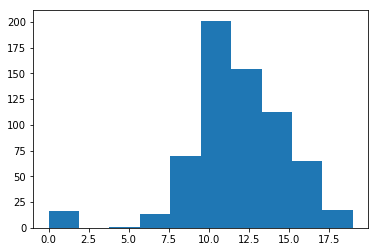

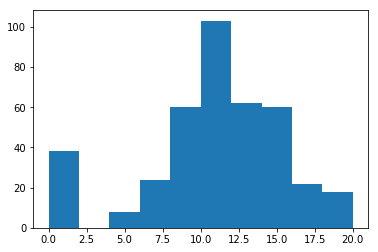

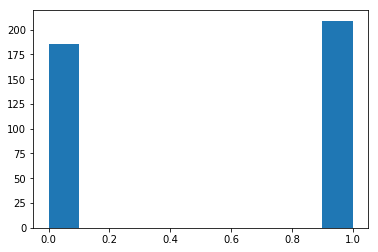

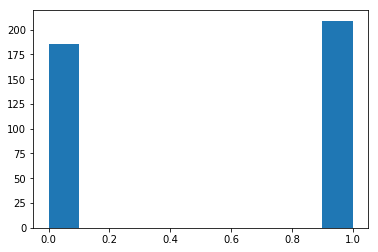

TypeError: len() of unsized object

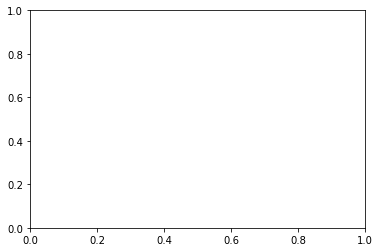

In [58]:
# Here I am creating new dataframes from the originar dataframe where the outcome is binary and 5-categorical

df_raw_por_bi = df_raw_por.copy(deep=True)
df_raw_por_5c = df_raw_por.copy(deep=True)

df_raw_mat_bi = df_raw_mat.copy(deep=True)
df_raw_mat_5c = df_raw_mat.copy(deep=True)

# Here I am transforming G3 in a Binary variable

df_raw_por_bi['G3'] =  df_raw_por_bi['G3'].apply(lambda x: 1 if x > 10 else 0)
df_raw_mat_bi['G3'] =  df_raw_mat_bi['G3'].apply(lambda x: 1 if x > 10 else 0)

# Here I am defining the function to translate grades in Erasmus scale

def erasmus(x):
    if x == 10 or x == 11 or x == 12:
        return 'D'
    elif x == 12 or x == 13:
        return 'C'
    elif x == 14 or x == 15:
        return 'B'
    elif x == 16 or x == 17 or x == 18 or x == 19 or x == 20:
        return 'A'
    else:
        return 'F'

# Here I am transforming G3 in a 5-category variable

df_raw_por_5c['G3'] =  df_raw_por_5c['G3'].apply(erasmus)
df_raw_mat_5c['G3'] =  df_raw_mat_5c['G3'].apply(erasmus)

# Histograms for the output variables (binary/5-level classification and regression)

#df_raw_por_bi['G3'].value_counts().plot(kind='bar')

plt.hist(df_raw_por['G3'])
plt.show()

plt.hist(df_raw_mat['G3'])
plt.show()

plt.hist(df_raw_mat_bi['G3'])
plt.show()

plt.hist(df_raw_mat_bi['G3'])
plt.show()

plt.hist(df_raw_mat_5c['G3'])
plt.show()

plt.hist(df_raw_mat_5c['G3'])
plt.show()

### 4.4. Distribution of attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113afda90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1157839d0>]], dtype=object)

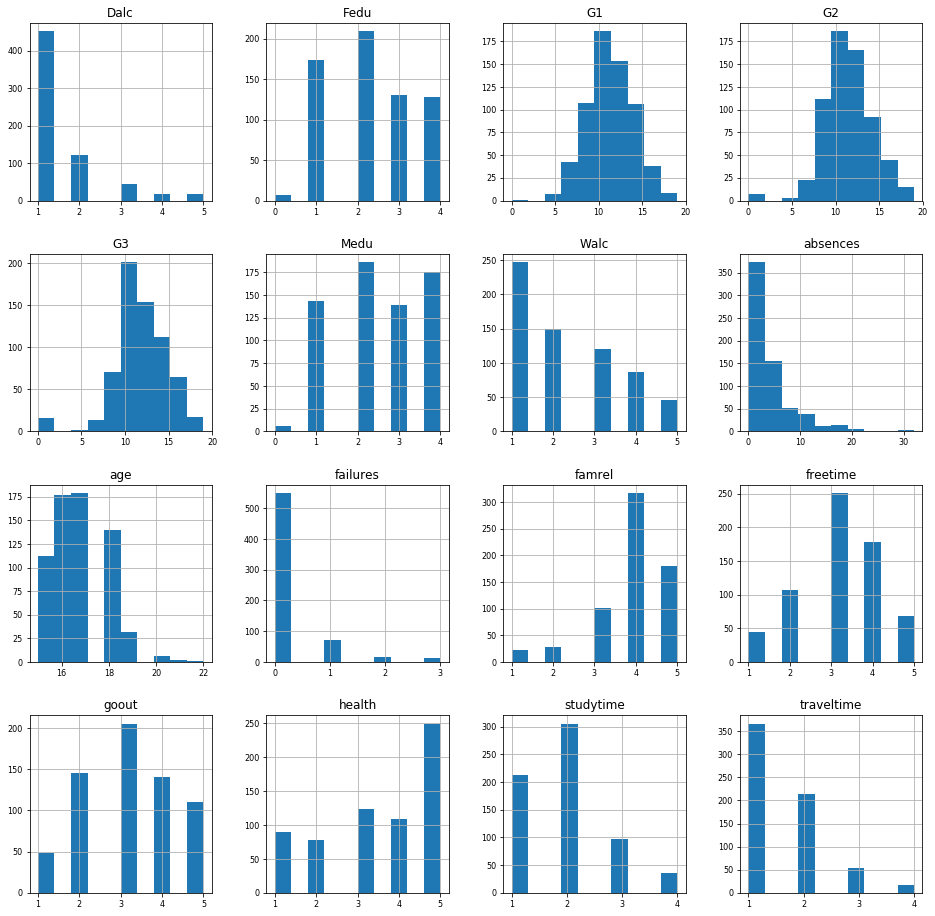

In [8]:
df_raw_por.hist(figsize=(16, 16), bins=10, xlabelsize=8, ylabelsize=8)

#boxplot 2 
df['gpa'].plot(kind='box')
#df.boxplot(column='gpa', return_type='axes')

#### Question 6. Create box plots for GRE and GPA

**Comment:** If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, GPA and GRE are skewed toward the upper ranges.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Ansswer: Though slightly skewed, in this setting there is no need to correct anything.

### 4.5. Outliers

### 4.6. Correlation

In [10]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


Before fitting the next phase of fitting models, some preprocessing was required by the NN and SVM models. The nominal variables (e.g. Mjob) were transformed into a 1-of-C enconding and all attributes were standardized to a zero mean and one standard deviation. 

#### Question 12. What did you find?

Answer: Colinearity is not a concern here.

### 4.7. Final hypothesis

Answer: Students who attended a more prestigious undergraduate institution are more likely to be admitted to graduate school. 

## Bonus/Advanced

#### 2. Bonus: Log transform the skewed data